In [17]:
import torch
import torch.nn as nn
import random
import matplotlib.pyplot as plt

In [18]:
vocab_size = 256

x_  = list(map(ord,'hello'))
y_ = list(map(ord, 'hola'))

x = torch.LongTensor(x_)
y = torch.LongTensor(y_)

In [19]:
x

tensor([104, 101, 108, 108, 111])

In [20]:
class Seq2Seq(nn.Module):
  def __init__(self, vocab_size, hidden_size):
    super(Seq2Seq, self).__init__()
    #보통은 임베딩 후 히든 레이어에 그대로 넣는다.
    self.n_layers=1
    self.hidden_size = hidden_size

    self.embedding = nn.Embedding(vocab_size, hidden_size)
    self.encoder = nn.GRU(hidden_size, hidden_size)
    self.decoder = nn.GRU(hidden_size, hidden_size)

    self.project = nn.Linear(hidden_size, vocab_size)

  def forward(self, inputs, targets):
    initial_state = self.__init_state()
    embedding = self.embedding(inputs).unsqueeze(1)

    encoder_output, encoder_state = self.encoder(embedding, initial_state)
    decoder_state = encoder_state
    decoder_input = torch.LongTensor([0]) #<start of sentence token>

    outputs = []
    for i in range(targets.size()[0]):
      decoder_input = self.embedding(decoder_input).unsqueeze(1)
      decoder_output, decoder_state = self.decoder(decoder_input, decoder_state)

      projection = self.project(decoder_output)
      outputs.append(projection)

      decoder_input = torch.LongTensor([targets[i]])

    outputs = torch.stack(outputs).squeeze()
    return outputs

  def __init_state(self, batch_size=1):
    weight = next(self.parameters()).data
    return weight.new(self.n_layers, batch_size, self.hidden_size).zero_()


In [21]:
seq2seq = Seq2Seq(vocab_size,16)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(seq2seq.parameters(), lr=1e-3)


 반복 : 0  오차 : 5.5279622077941895
['"', '®', '"', 'à']

 반복 : 100  오차 : 1.9042904376983643
['h', 'h', 'l', 'a']

 반복 : 200  오차 : 0.7285245656967163
['h', 'o', 'l', 'a']

 반복 : 300  오차 : 0.46493151783943176
['h', 'o', 'l', 'a']

 반복 : 400  오차 : 0.3451770544052124
['h', 'o', 'l', 'a']

 반복 : 500  오차 : 0.2682364881038666
['h', 'o', 'l', 'a']

 반복 : 600  오차 : 0.1905914545059204
['h', 'o', 'l', 'a']

 반복 : 700  오차 : 0.14068254828453064
['h', 'o', 'l', 'a']

 반복 : 800  오차 : 0.10668874531984329
['h', 'o', 'l', 'a']

 반복 : 900  오차 : 0.07516257464885712
['h', 'o', 'l', 'a']


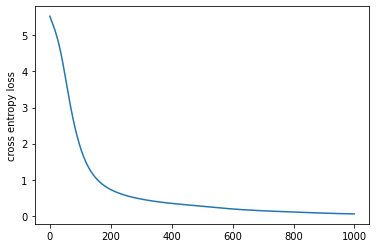

In [24]:
log = []
for i in range(1000):
  prediction = seq2seq(x,y)
  loss = criterion(prediction,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  loss_val = loss.data
  log.append(loss_val)
  if i % 100 ==0:
    print("\n 반복 : %d  오차 : %s" %(i,loss_val.item()))
    _, top1 = prediction.data.topk(1,1)
    print([chr(c) for c in top1.squeeze().numpy().tolist()])

plt.plot(log)
plt.ylabel('cross entropy loss')
plt.show()